# Supplementary Figure 6
Modeled total phosphorus compared to bi-weekly in-situ observations. Surface observations are from the Outer Harbor sampling survey part of the Milwaukee Metropolitan Sewerage District (MMSD) monitoring program (data available at http://www.waterbase.glwi.uwm.edu/mmsd/ ). Data is collected during non-ice conditions near the Jones Island Wastewater Treatment Plant. 

### Outer Harbor sampling survey

![title](http://www.waterbase.glwi.uwm.edu/mmsd/maps/outer_harbor.jpg)

In [1]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import AutoMinorLocator

In [2]:
def dms_to_dd(vec):
    return vec[0] + float(vec[1])/60 + float(vec[2])/3600

In [3]:
%run _load_directories.ipynb

DIRECTORIES
>> {dir_raw}
/local/data/artemis/workspace/gloege/MITgcm-Michigan-Phosphorus/data/raw

>> {dir_clean}
/local/data/artemis/workspace/gloege/MITgcm-Michigan-Phosphorus/data/clean

>> {dir_figs}
/local/data/artemis/workspace/gloege/MITgcm-Michigan-Phosphorus/results/figures


# Process MMSD
MMSD TP data is in units of mg/L. These are converted to ug/L by multiplying by 1000. 

latitude and longitude from each site can be found here http://www.waterbase.glwi.uwm.edu/mmsd/

In [5]:
survey='OH'

In [6]:
### =========================
### Load MMSD and put into dataframe
### =========================
allFiles = glob.glob(f'{dir_raw}/mmsd/{survey}*.csv')
frame = pd.DataFrame()
list_ = []

## Loop over and append all the SURVEY files
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
    frame = pd.concat(list_)
        
## convert time to datetime
frame['Collection Date'] = pd.to_datetime(frame['Collection Date'])


### =========================
### If elif statement to get 
### stations and lat/lon
### =========================

### OUTER HARBOR
if survey=='OH':
    stations = ['OH-01','OH-02','OH-03','OH-04','OH-05','OH-06','OH-07',
                'OH-08','OH-09','OH-10','OH-11','OH-12','OH-13','OH-14','OH-15']

    #stations = ['OH-03','OH-04','OH-05','OH-06','OH-07',
    #            'OH-08','OH-09','OH-10','OH-11','OH-12','OH-13','OH-14']
    
    stations = ['OH-03','OH-04','OH-05','OH-06','OH-07','OH-08','OH-09','OH-11']

    
    lat_lon = {'OH-01': [dms_to_dd([43, 1, 30]), dms_to_dd([87, 53, 47])],
               'OH-02': [dms_to_dd([43, 1, 28]), dms_to_dd([87, 53, 36])],
               'OH-03': [dms_to_dd([43, 1, 34]), dms_to_dd([87, 53, 29])],
               'OH-04': [dms_to_dd([43, 2, 16]), dms_to_dd([87, 53, 24])],
               'OH-05': [dms_to_dd([43, 2, 43]), dms_to_dd([87, 52, 52])],
               'OH-06': [dms_to_dd([43, 2, 12]), dms_to_dd([87, 52, 51])],
               'OH-07': [dms_to_dd([43, 1, 34]), dms_to_dd([87, 52, 57])],
               'OH-08': [dms_to_dd([43, 1, 1]),  dms_to_dd([87, 52, 43])],
               'OH-09': [dms_to_dd([43, 0, 33]), dms_to_dd([87, 52, 36])],
               'OH-10': [dms_to_dd([43, 0, 4]),  dms_to_dd([87, 53, 10])],
               'OH-11': [dms_to_dd([43, 0, 52]), dms_to_dd([87, 53, 14])],
               'OH-12': [dms_to_dd([43, 2, 40]), dms_to_dd([87, 52, 3])],
               'OH-13': [dms_to_dd([43, 0, 31]), dms_to_dd([87, 51, 10])],
               'OH-14': [dms_to_dd([43, 1, 38]), dms_to_dd([87, 51, 48])],
               'OH-15': [dms_to_dd([43, 2, 50]), dms_to_dd([87, 53, 13])]}
    
### SOUTH SHORE
elif survey=='SS':
    stations = ['SS-01','SS-02','SS-03','SS-04','SS-05','SS-06','SS-07',
                'SS-08','SS-09','SS-10','SS-11','SS-12']
    
    lat_lon = {'SS-01': [dms_to_dd([42, 53, 29]), dms_to_dd([87, 50, 6])],
              'SS-02': [dms_to_dd([42, 53, 29]), dms_to_dd([87, 50, 20])],
              'SS-03': [dms_to_dd([42, 53, 29]), dms_to_dd([87, 49, 52])],
              'SS-04': [dms_to_dd([42, 53, 40]), dms_to_dd([87, 50, 5])],
              'SS-05': [dms_to_dd([42, 53, 40]), dms_to_dd([87, 50, 18])],
              'SS-06': [dms_to_dd([42, 53, 39]), dms_to_dd([87, 50, 52])],
              'SS-07': [dms_to_dd([42, 53, 19]), dms_to_dd([87, 49, 6])],
              'SS-08': [dms_to_dd([42, 53, 19]), dms_to_dd([87, 50, 20])],
              'SS-09': [dms_to_dd([42, 53, 19]), dms_to_dd([87, 49, 53])],
              'SS-10': [dms_to_dd([42, 52, 59]), dms_to_dd([87, 50, 6])],
              'SS-11': [dms_to_dd([42, 53, 29]), dms_to_dd([87, 49, 25])],
              'SS-12': [dms_to_dd([42, 53, 60]), dms_to_dd([87, 50, 5])]}
    
### NEAR SHORE
elif survey=='NS':
    stations = ['NS-01','NS-02','NS-03','NS-04','NS-05','NS-06','NS-07',
                'NS-08','NS-09','NS-10','NS-11','NS-12','NS-13','NS-14','NS-27','NS-28']
    
    stations = ['NS-14','NS-08','NS-05']
    stations = ['NS-03']
    
    lat_lon = {'NS-01': [dms_to_dd([42, 46, 34]), dms_to_dd([87, 42, 6])],
              'NS-02': [dms_to_dd([42, 53, 48]), dms_to_dd([87, 48, 18])],
              'NS-03': [dms_to_dd([42, 53, 48]), dms_to_dd([87, 44, 42])],
              'NS-04': [dms_to_dd([42, 58, 0]), dms_to_dd([87, 50, 30])],
              'NS-05': [dms_to_dd([42, 58, 0]), dms_to_dd([87, 48, 24])],
              'NS-06': [dms_to_dd([42, 58, 0]), dms_to_dd([87, 44, 42])],
              'NS-07': [dms_to_dd([43, 4, 42]), dms_to_dd([87, 50, 48])],
              'NS-08': [dms_to_dd([43, 4, 48]), dms_to_dd([87, 48, 18])],
              'NS-09': [dms_to_dd([43, 4, 48]), dms_to_dd([87, 44, 42])],
              'NS-10': [dms_to_dd([43, 10, 0]), dms_to_dd([87, 44, 42])],
              'NS-11': [dms_to_dd([42, 53, 29]), dms_to_dd([87, 49, 25])],
              'NS-12': [dms_to_dd([43, 1, 34]), dms_to_dd([87, 53, 29])],
              'NS-13': [dms_to_dd([43, 1, 34]), dms_to_dd([87, 52, 57])],
              'NS-14': [dms_to_dd([43, 1, 38]), dms_to_dd([87, 51, 48])],
              'NS-27': [dms_to_dd([42, 53, 19]), dms_to_dd([87, 50, 6])],
              'NS-28': [dms_to_dd([43, 1, 30]), dms_to_dd([87, 53, 47])]}
else:
    stations, lat_lon = [], []
    print('NOT A SURVEY')
    
    
    
### =========================
### Select sites and dates from MMSD
### =========================
df_2007_2010 = frame[(frame['Site'].isin(stations)) &
                  (frame['Sample Depth']=='S') &
                  (frame['Collection Date'].dt.year>=2007)]

df_daily_avg = df_2007_2010.groupby([(df_2007_2010['Collection Date'].dt.year.rename('year')),
                                   (df_2007_2010['Collection Date'].dt.month.rename('month')),
                                   (df_2007_2010['Collection Date'].dt.day.rename('day'))]).mean()


### =========================
### Convert MMSD time to datetime
### This is necessary because it is grouped index
### =========================
yr, mn, day = [], [], []
for i in np.arange(len(df_daily_avg.index)):
    yr_tmp, mn_tmp, day_tmp = df_daily_avg.index[i]
    yr.append(yr_tmp)
    mn.append(mn_tmp)
    day.append(day_tmp)
    
df = pd.DataFrame({'year': yr,'month': mn,'day':day})
df_time = pd.to_datetime(df)


### =========================
### Put MMSD into dataset
### =========================
ds_MMSD = xr.Dataset(
    {'phos': (['time'],  df_daily_avg['Total Phosphorus'].values*1000) },
    coords={'time': (['time'], df_time)})

# Process Model output
Daily output is too much to store on github. To recreate this figure you will
need to download daily model output from figshare

In [7]:
### ================================================
### Load model output
### ================================================

## <><><><><><><><><><><><><><><><><><><><><>
## This directory is not contained in the github repo
## <><><><><><><><><><><><><><><><><><><><><>
data_dir='/local/data/artemis/workspace/gloege/MITgcm-Michigan-Phosphorus/data/raw/model'

ds = xr.open_mfdataset(f'{data_dir}/phos.*.nc') * 2.5

ds_tmp = ds['Fox'] + ds['Grand'] + ds['Kalamazoo'] + ds['Manistee'] + ds['Manistique'] \
        + ds['Menominee'] + ds['Milwaukee'] + ds['Muskegon'] + ds['PereMarquette'] \
        + ds['Sheboygan'] + ds['StJoseph']

ds_phos = ds_tmp.squeeze()


### ================================================
### force time vector to be proper format and range
### ================================================
dates = pd.date_range(start='2007-01-01T00:00:00.000000000', 
                  end='2010-12-31T00:00:00.000000000',freq='D')
#da_dates = xr.DataArray(dates, dims='time')

# Put dates into dataset
ds_phos['T'] = dates


### =========================
### Get mean location of MMSD sites
### =========================
#stations = list(lat_lon.keys())
#lats = np.mean([lat_lon[k][0] for k in stations])
#lons = np.mean([-lat_lon[k][1] for k in stations])
#print([lats, lons])


### =========================
### Get mean location of MMSD sites
### =========================
#stations = list(lat_lon.keys())
lats = [lat_lon[k][0] for k in stations]
lons = [-lat_lon[k][1] for k in stations]
#print([lats, lons])

### =========================
### Put into dataset
### =========================
ds_MOD = xr.Dataset(
    {'phos': (['time'], ds_phos.sel(X=lons, Y=lats, method='nearest').mean(['X', 'Y'])) },
    coords={'time': (['time'], ds_phos['T'])})


### =========================
### Sample model like MMSD
### =========================
ds_sampled = ds_MOD.where(ds_MOD['time']==ds_MMSD['time'])

/usr/local/python/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


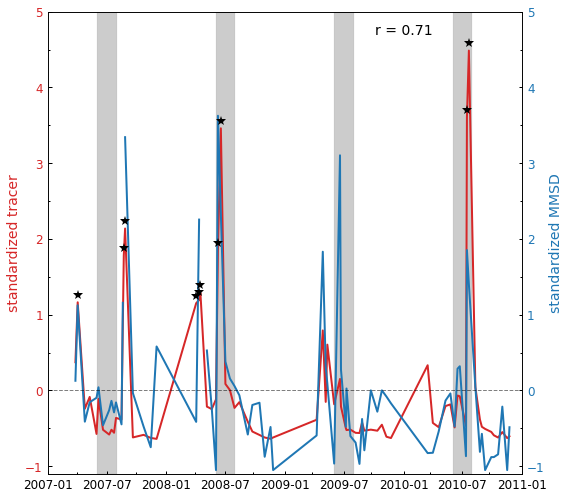

In [8]:
with plt.style.context(('seaborn-paper')):
    ### ==============================================================
    ### Define grids
    ### ==============================================================
    fig = plt.figure(figsize=(8.5,8.5))
    grid = AxesGrid(fig, 111, 
                    share_all=False,
                    nrows_ncols = (1, 1),
                    axes_pad = 0.5,
                    aspect=False,
                    cbar_mode="none",
                    label_mode = '')  # note the empty label_mode

    ax1 = grid[0]

    ax1.set_ylabel('standardized tracer', color='tab:red', fontsize=14)
    ax1.plot(ds_sampled['time'], (ds_sampled['phos']-ds_sampled['phos'].mean())/ds_sampled['phos'].std(), color='tab:red', linewidth=2)
    ax1.tick_params(axis='y', labelcolor='tab:red')

    # instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx() 
    ax2.set_ylabel('standardized MMSD', color= 'tab:blue', fontsize=14)  
    ax2.plot(ds_MMSD['time'], (ds_MMSD['phos']-ds_MMSD['phos'].mean())/ds_MMSD['phos'].std(), color= 'tab:blue', linewidth=2)
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    ax1.set_xlim(['2007-01-01', '2011-01-01'])
    
    ax1.set_yticks(np.arange(-10,16,1))
    ax1.set_ylim([-1.1, 5])
    
    ax2.set_yticks(np.arange(-10,16,1))
    ax2.set_ylim([-1.1, 5])

    ### ==============================================================
    ### Make axes square
    ### ==============================================================
    #x0,x1 = ax1.get_xlim()
    #y0,y1 = ax1.get_ylim()
    #ax1.set_aspect(abs(x1-x0)/abs(y1-y0))
    #ax1.get_position().bounds

    ### ==============================================================
    ### Minor ticks
    ### ==============================================================
    ax1.tick_params(axis='both', 
               which='both', 
               direction='in', 
               width=1, 
               color='k', 
               pad=5, 
               labelsize=12)
    ax2.tick_params(axis='both', 
               which='both', 
               direction='in', 
               width=1, 
               color='k', 
               pad=5, 
               labelsize=12)
    ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

    ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
    
    ### ==============================================================
    ### Shade June July August
    ### ==============================================================
    tstart = pd.to_datetime('2007-06-01')
    tend = pd.to_datetime('2007-08-01')
    ax1.axvspan(tstart, tend, alpha=0.2, color='black')
    
    tstart = pd.to_datetime('2008-06-01')
    tend = pd.to_datetime('2008-08-01')
    ax1.axvspan(tstart, tend, alpha=0.2, color='black')
    
    tstart = pd.to_datetime('2009-06-01')
    tend = pd.to_datetime('2009-08-01')
    ax1.axvspan(tstart, tend, alpha=0.2, color='black')
    
    tstart = pd.to_datetime('2010-06-01')
    tend = pd.to_datetime('2010-08-01')
    ax1.axvspan(tstart, tend, alpha=0.2, color='black')
    
    ### ==============================================================
    ### correlation
    ### ==============================================================
    tstart = pd.to_datetime('2010-01-01')
    ax1.text(tstart, 4.75, r'r = 0.71',
         {'color': 'k', 'fontsize': 14, 'ha': 'center', 'va': 'center'})
    
    
    tstart = pd.to_datetime('2007-01-01')
    tend = pd.to_datetime('2011-01-01')
    #median = ds_MMSD['phos'].median().values
    ax2.plot([tstart, tend], [0, 0], color='black', linestyle='dashed', linewidth=1, alpha=0.5)
    
    ### ==============================================================
    ### Show peaks
    ### ==============================================================
    normalized = (ds_sampled['phos']-ds_sampled['phos'].mean())/ds_sampled['phos'].std()
    times = ds_sampled['time'].where(normalized>1)
    peaks = normalized.where(normalized>1)
    ax2.plot(times,peaks+0.1,'*',markersize=10, color='black',zorder=100)

# Save Figure

In [9]:
fig.savefig(f'{dir_figs}/Supplemental_Figure_6.pdf', bbox_inches='tight',pad_inches=0)

/usr/local/python/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


# Statistics

### Correlation
doesn't matter if did not standardize here, it only shifts the curve

In [10]:
import pandas as pd
df = pd.DataFrame({'model': ds_sampled['phos'].values,
                   'mmsd' : ds_MMSD['phos'].values})

df.corr()

,model,mmsd
model,1.000000,0.710152
mmsd,0.710152,1.000000


### Median value

In [11]:
print(ds_MMSD['phos'].median().values)
print(ds_sampled['phos'].median().values)
print(ds_MMSD['phos'].median().values/ds_sampled['phos'].median().values)

26.333333333333332
0.6893570423126221
38.19984669336448
